## Neural Networks

We start with the most simple type of neural network, a single perceptron. Let us consider the case, we want to learn the or-function using a perceptron.

In [42]:
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
%matplotlib inline

"display_decision_boundaries" is a helper function that allows us to visualize the decision boundaries of a boolean function.

In [43]:
def display_decision_boundaries(cl):
    x_data=[]
    y_data=[]
    for x in range(0,100):
        for y in range(0,100):
            prediction=cl.predict([[x/100.0,y/100.0]])[0]
            if (prediction>0.5):
                x_data.append(x/100.0)
                y_data.append(y/100.0)
    plt.plot(x_data,y_data,'bo') 

Let us define the vector of all potential input parameter combinations.

In [44]:
X=[[0,0],[0,1],[1,0],[1,1]]

We then define the vector of the desired function outputs.

In [45]:
y_or=[0,1,1,1]

We now create a perceptron object

In [46]:
perceptron=Perceptron()

fit it to the data

In [48]:
perceptron.fit(X,y_or)

Perceptron()

and predict the output for all possible parameter combinations.

In [49]:
predictions=perceptron.predict(X)

In [50]:
predictions

array([0, 1, 1, 1])

One can see that the or function is correctly learned. Now we visualize the decision boundary. All possible parameter combination located in the blue area would be assigned to 1 by the perceptron, all other combinations to zero. 

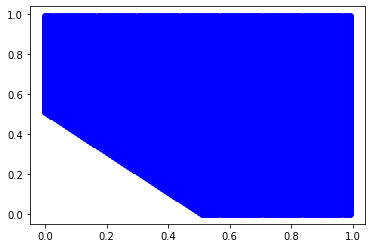

In [51]:
display_decision_boundaries(perceptron)


We repeat the same procedure with the "and" function, which assumes the value of  if and only one both parameter values are one. 

In [52]:
y_and=[0,0,0,1]
perceptron.fit(X,y_and)


Perceptron()

In [53]:
predictions=perceptron.predict(X)

In [54]:
predictions

array([0, 0, 0, 1])

Let us again determine the decision boundary. You can see that the decision boundary is moved upwwards in comparison with
the or function.

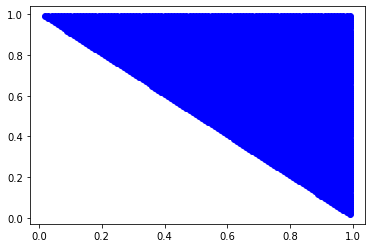

In [55]:
display_decision_boundaries(perceptron)


Finally, we try to train the exclusive or function "xor", which assumes the value of 1 if either of the input values are 1 but not both simultaneously. You should see that this is indeed not possible, since this function is not linearly separable. 

In [56]:
y_xor=[0,1,1,0]

In [57]:
perceptron.fit(X,y_xor)

Perceptron()

In [58]:
predictions=perceptron.predict(X)

In [59]:
predictions

array([0, 0, 0, 0])

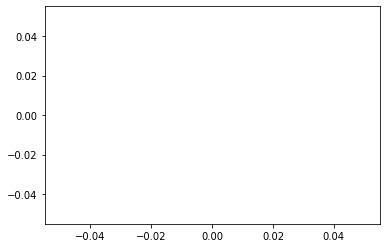

In [60]:
display_decision_boundaries(perceptron)

You should see that everyhing would be mapped to 0. 

To learn xor we need a mlp (multi layer perceptron).

In [61]:
cl= MLPClassifier(alpha=0.00002,activation='tanh', max_iter=1000000, hidden_layer_sizes=(4,2),batch_size=4,tol=0.0000001)

We fit the model on our data

In [62]:
cl.fit(X,y_xor)

MLPClassifier(activation='tanh', alpha=2e-05, batch_size=4,
              hidden_layer_sizes=(4, 2), max_iter=1000000, tol=1e-07)

and apply it on the input vector X

In [65]:
predictions=cl.predict([[0,0],[0,1],[1,0],[1,1]])

In [66]:
predictions

array([0, 1, 1, 0])

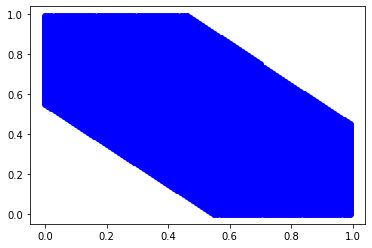

In [68]:
display_decision_boundaries(cl)


You can see that there are two decision boundaries now.

Now let us apply a neural network on the skin disesase data.

In [69]:
df=pd.read_csv("skin_disease.csv")
di = {1: 0, 255: 2}
df=df.replace({"class": di})
df[df["class"]==2]
di = {2: 1}
df=df.replace({"class": di})
df[df["class"]==1]
#del df["x"]
#del df["y"]
#del df["expertsEczemaVotePatch"]
#del df["expertsEczemaAllVotePatch"]
#del df["expertsEczemaVoteCenterPixel"]
df=df.sample(frac=1)
df=df.iloc[0:100000]



In [70]:
train, test = train_test_split(df, test_size=0.5)
X_train = train.drop('class', axis=1)
X_test = test.drop('class', axis=1)
y_train = train["class"]
y_test = test["class"]

create a neural network

In [71]:
cl= MLPClassifier(alpha=0.00002,activation='tanh', max_iter=10000, hidden_layer_sizes=(30,15),batch_size=1000,tol=0.00000001)

Train the neural network on X_train, y_train

In [ ]:
cl.fit(X_train, y_train)

Apply the model on X_test

In [40]:
predictions=cl.predict(X_test)


Output accuracy and f1-score

In [41]:
accuracy=sklearn.metrics.accuracy_score(y_test, predictions)
fscore=sklearn.metrics.f1_score(y_test,predictions)
print ("fscore Neural Network: ",fscore)
print ("accuracy Neural Network: ",accuracy)

fscore Neural Network:  0.0
accuracy Neural Network:  1.0


c:\users\adiwi\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
